# Hotel Reservations Cancellation Prediction

The aim of this project to predict the possible reservations that are going to cancelled by the customers by analyzing various features and variables associated with the reservation.

### Data Dictionary

Column Name 

Booking_ID

no_of_adults

no_of_children

no_of_weekend_nights

no_of_week_nights

meal_type

required_car_parking_spaces

lead_time

arrival_month

arrival_date

market_segment

repeated_guest 

no_previous_cancellations

previous_bookings_not_canceled

avg_price_per_room

no_of_special_requests

booking_status

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [139]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Preprocessing

In [140]:
df.shape

(36275, 19)

The dataset consist of 36275 Rows and 19 Columns

In [141]:
df.drop(['Booking_ID'], axis=1, inplace=True)

Combining the year, month and day columns into a single column for date of arrival (yyyy/mm/dd)

In [142]:
df['date of arrival'] = df['arrival_year'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_date'].astype(str)

df['date of arrival'] = pd.to_datetime(df['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)

df.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

/var/folders/_2/sfh5x86n6kv0zn4jxf7qlb7w0000gn/T/ipykernel_1717/2182862588.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date of arrival'] = pd.to_datetime(df['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)


In [143]:
df.isnull().sum()

no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
date of arrival                         37
dtype: int64

In [144]:
df.dropna(inplace=True)
df.reset_index()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36234,36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17
36235,36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36236,36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21


In [145]:
df.dtypes

no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                               object
required_car_parking_space                       int64
room_type_reserved                              object
lead_time                                        int64
market_segment_type                             object
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_status                                  object
date of arrival                         datetime64[ns]
dtype: object

In [146]:
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3919
no_of_special_requests                     6
booking_status                             2
date of arrival                          549
dtype: int64

Descriptive Statistics

In [147]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date of arrival
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,0.025553,0.023346,0.152961,103.437259,0.619957,2018-05-24 16:37:29.130746880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,0.157801,0.368483,1.753366,35.084264,0.786403,NaN


Here the minimum average price per room and number of adults is zero, which is not possible so, it is replaced with the price with with mean value and drop the rows with zero adults.

In [148]:
df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)

/var/folders/_2/sfh5x86n6kv0zn4jxf7qlb7w0000gn/T/ipykernel_1717/10096424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)


In [149]:
df.drop(df[df['no_of_adults'] == 0].index, inplace = True)

In [150]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


## Exploratory Data Analysis



### Services 

Text(0.5, 1.0, 'Number of special requests')

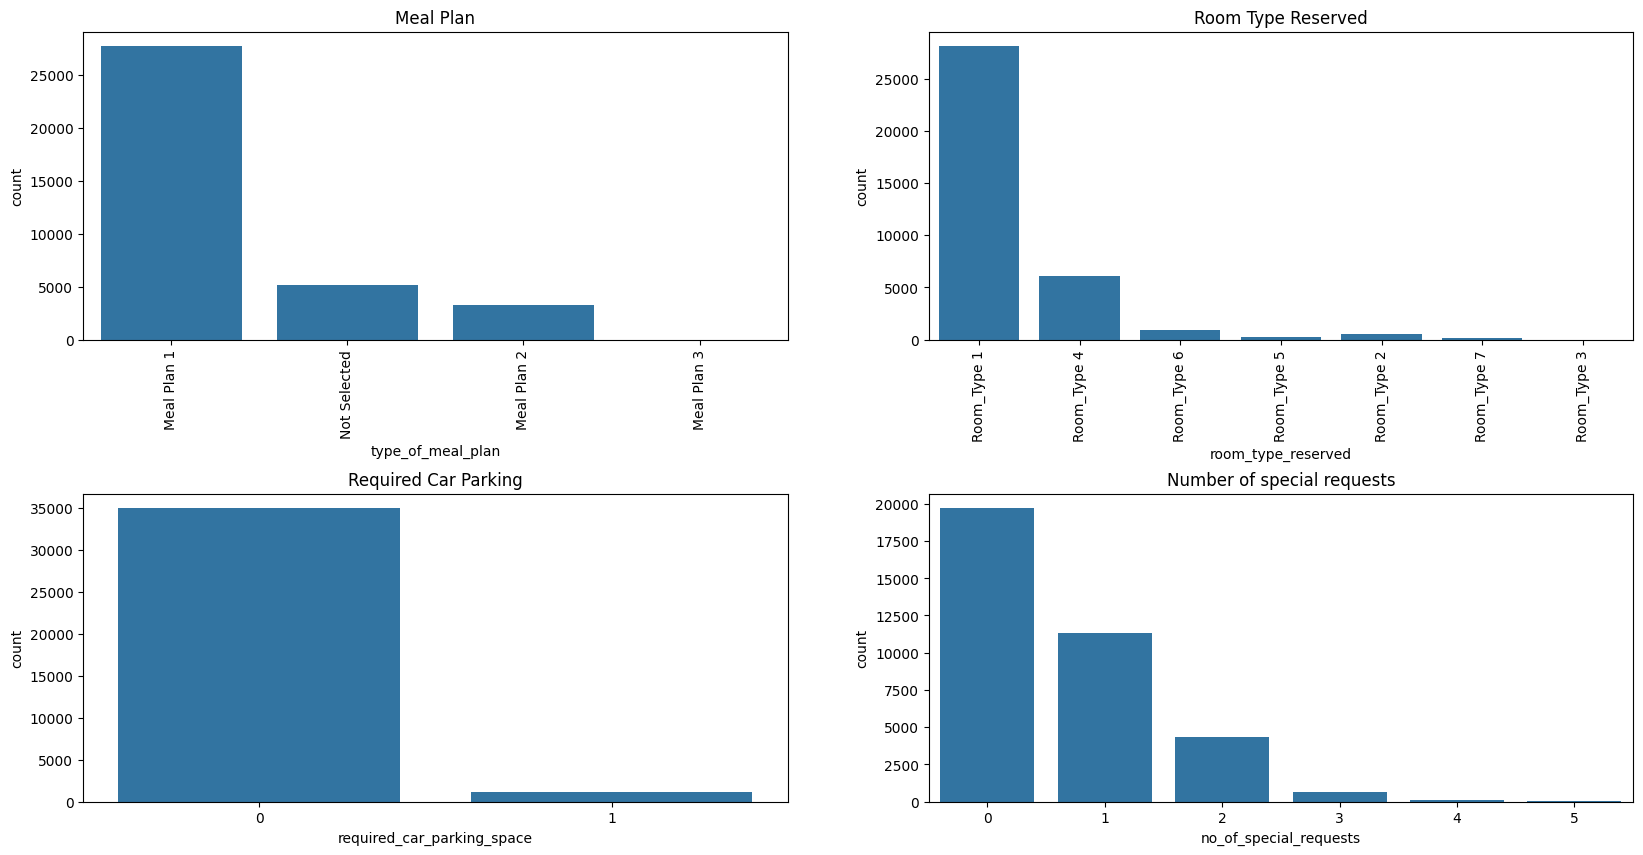

In [151]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0]).set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1]).set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0]).set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1]).set_title('Number of special requests')

The above graphs shows the type of services of the hotel taken by the guests during reservations. Majority of the guests preferred Meal Plan1 and Room Type 1 and no special requests during reservations and most of them don't require parking space. Moreover a significant number of reservations were made without specifiying the type of meal plan, which could mean that the guests might have meal outside the hotel. The required parking space graph also tells about the mode of transportation used by the guests. Most of the guests used public transport or taxi to reach the hotel.

### Lead time (days between date of reservation and date of arrival)

Text(0.5, 1.0, 'Lead Time in days')

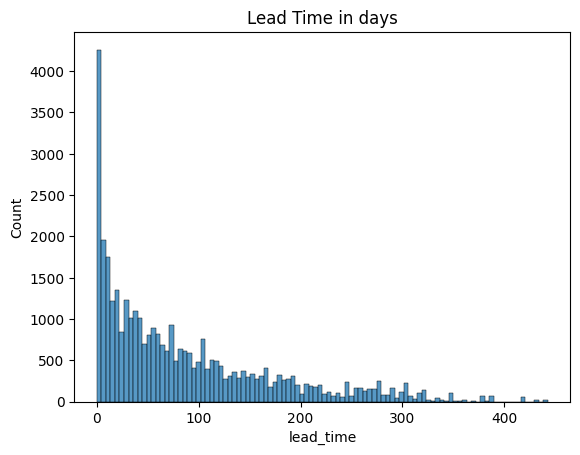

In [152]:
sns.histplot(x = 'lead_time', data = df, bins=100).set_title('Lead Time in days')

### Market Segment

Text(0.5, 1.0, 'Market Segment Type')

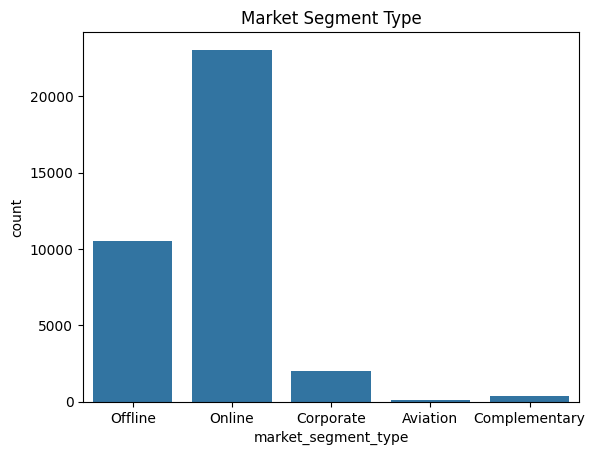

In [153]:
sns.countplot(x = 'market_segment_type', data = df).set_title('Market Segment Type')

### Guest's previous experience with the hotel

Text(0.5, 1.0, 'Number of Previous Bookings Not Cancelled')

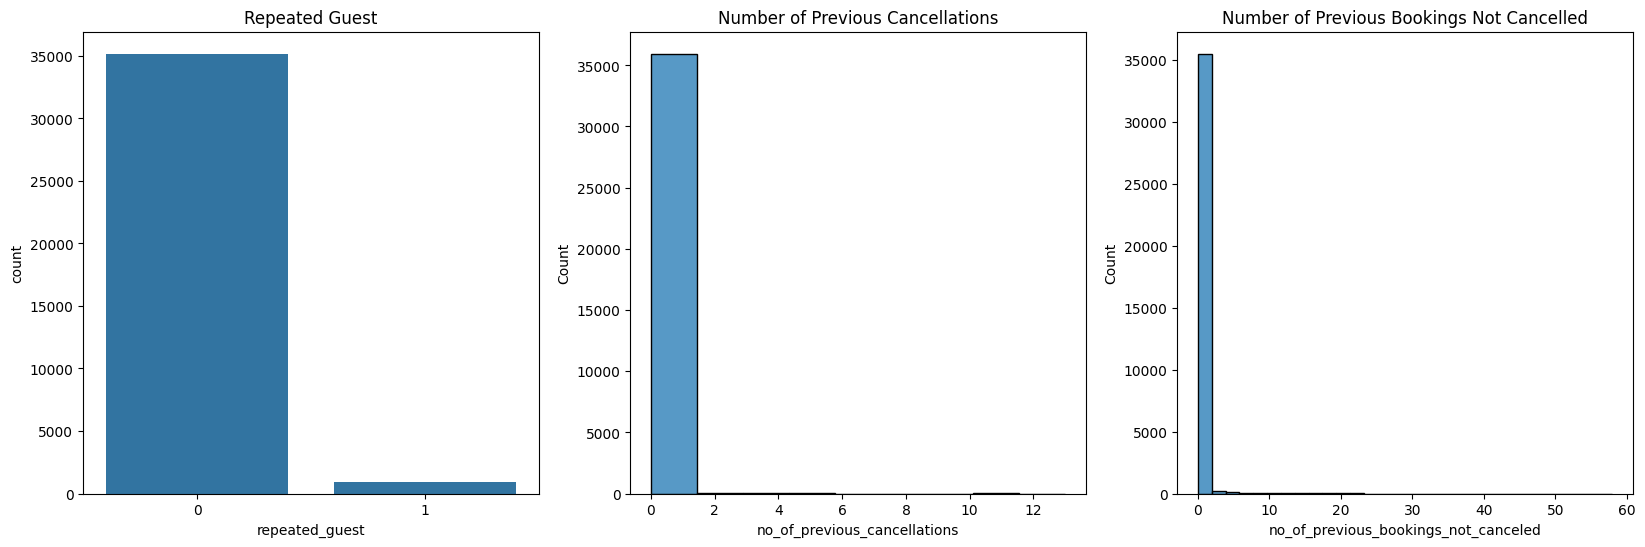

In [154]:
fig, ax = plt.subplots(1,3,figsize=(20,6))

sns.countplot(x = 'repeated_guest', data = df, ax=ax[0]).set_title('Repeated Guest')

sns.histplot(x = 'no_of_previous_cancellations', data = df, ax=ax[1], bins = 9).set_title('Number of Previous Cancellations')

sns.histplot(x = 'no_of_previous_bookings_not_canceled', data = df, ax=ax[2], bins = 30).set_title('Number of Previous Bookings Not Cancelled')

Majority of the reservations made at the hotel are by new guest, very few are the repeated guests at the hotel. This highlights the problem in the customer retention at the hotel. The hotel should focus on providing better services to the guests so that they would like to visit the hotel again. Since majority of the guest are new, so majority of the dataset has 0 pervious bookings cancellation. However, on a little bit closer look, we can see that there some guests who have cancelled their previous bookings. 

### Average room price

Text(0.5, 1.0, 'Average Room Price')

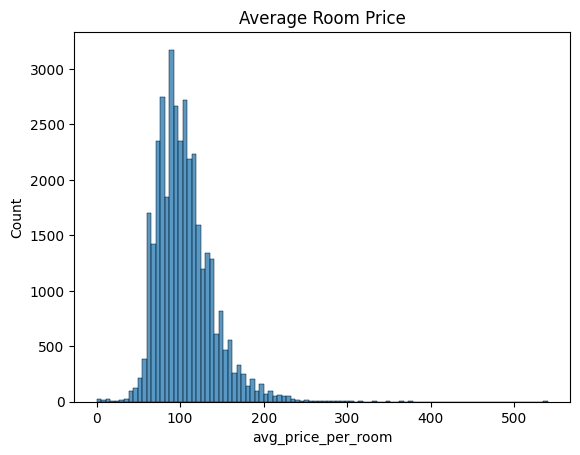

In [155]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100).set_title('Average Room Price')

This graph shows the distribution of the room price. Majority of the reservations made had room price between 75 to 150. Very few of the reservations had room price more than 200.

### Services and Cancellation

Text(0.5, 1.0, 'Number of special requests')

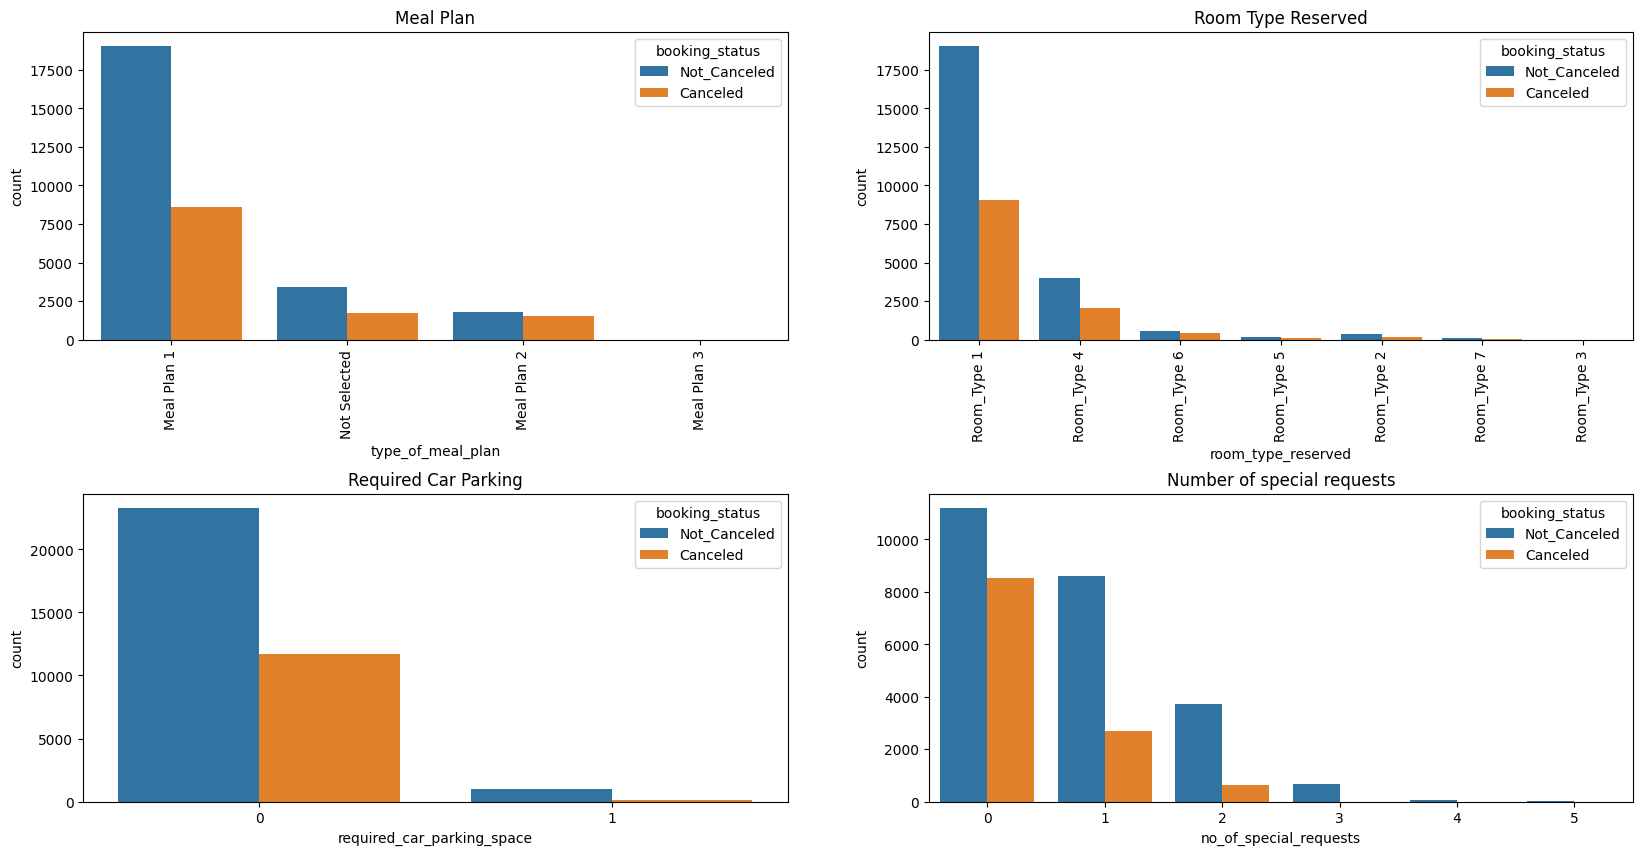

In [156]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0], hue = 'booking_status').set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1], hue = 'booking_status').set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0], hue = 'booking_status').set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1], hue = 'booking_status').set_title('Number of special requests')

In the above graphs, we can see that the ratio of cancelled and not cancelled reservations is almost same for all the services. Therefore, I can conclude that the services provided by the hotel does not have any impact on the reservation cancellation.

### Guest's previous experience and Cancellation

Text(0.5, 1.0, 'Repeated Guest')

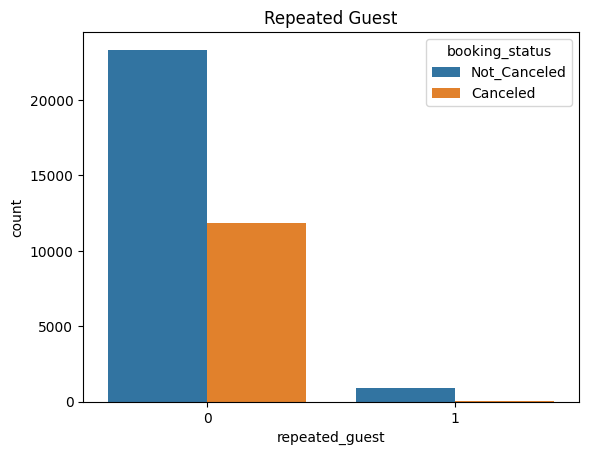

In [157]:
sns.countplot(x = 'repeated_guest', data = df, hue = 'booking_status').set_title('Repeated Guest')

The previous guest are much less likely to cancel the reservation as compared to the new guest. 

### Average room price and Cancellation

Text(0.5, 1.0, 'Average Room Price')

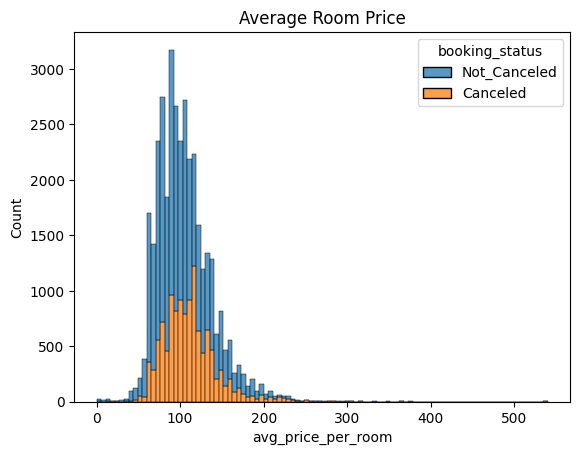

In [158]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100, hue = 'booking_status', multiple = 'stack').set_title('Average Room Price')

Most of the room prices are between 75-150 and the number of reservations cancellation mostly occur in the same range. Therefore, there is no relation between the room price and reservation cancellation.

## Data Preprocessing(Outlier Treatment)

### Outlier Removal using IQR

In [159]:
cols = ['lead_time', 'avg_price_per_room']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[cols] = df[cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

### Label Encoding

In [160]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

type_of_meal_plan [0 3 1 2]
room_type_reserved [0 3 5 4 1 6 2]
market_segment_type [3 4 2 0 1]
booking_status [1 0]


### Feature Scaling

In [161]:
from sklearn.preprocessing import StandardScaler
#standardizing the data
scaler = StandardScaler()
df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])

## Correlation Matrix Heatmap

<Axes: >

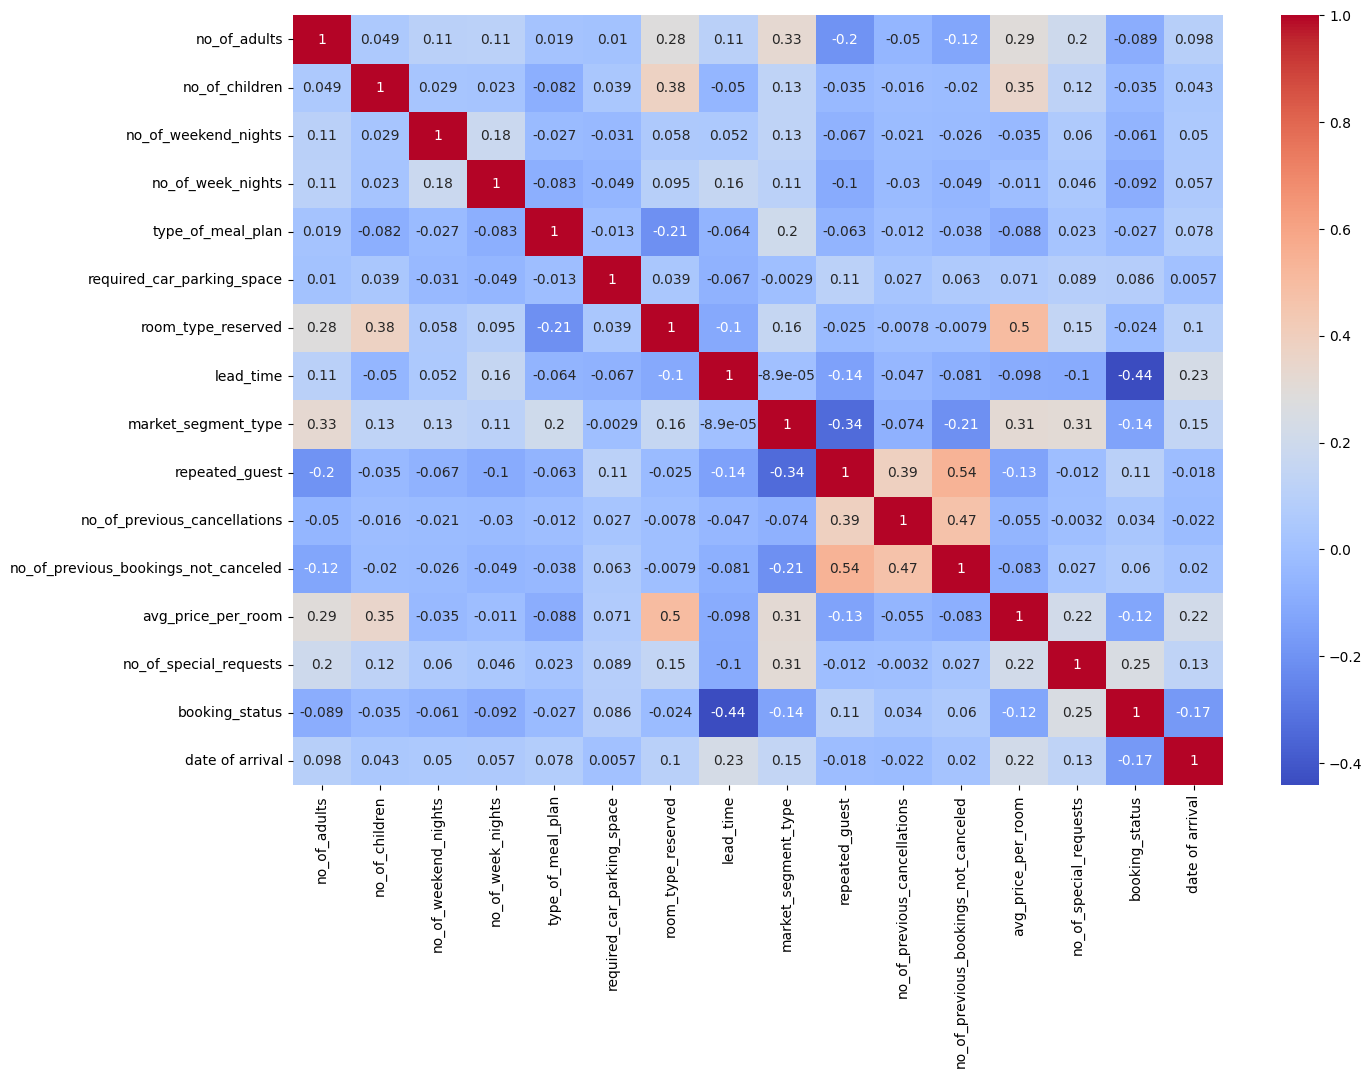

In [162]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [163]:
df.drop(columns=['date of arrival'], inplace=True)

## Train Test Split

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('booking_status', axis=1), df['booking_status'], test_size=0.2, random_state=42)

## Model Building

- Decision Tree Classifier
- Random Forest Classifier
- Logistic Regression

### Decision Tree Classifier

In [165]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [166]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

grid_search = GridSearchCV(estimator=dtree, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 42}


In [167]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

In [168]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=0)

In [169]:
print(dtree.score(X_train, y_train))

0.858547733647287


### Decision Tree has an Accuracy Score of 85

In [170]:
d_pred = dtree.predict(X_test)
d_pred

array([1, 1, 1, ..., 1, 1, 1])

### Random Forest Classifier

In [171]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [172]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

In [173]:
grid_search = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5, n_jobs=-1)

In [174]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]})

In [175]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [176]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

In [177]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=0)

In [178]:
print(rfc.score(X_train, y_train))

0.8496831607742651


### Random Forest Classifier has an Accuracy Score of 84

In [179]:
r_pred = rfc.predict(X_test)
r_pred

array([1, 1, 1, ..., 1, 1, 1])

### Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

Hyperparameter Tuning using GridSearchCV

In [181]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'random_state' : [0,42]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=grid_param, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

{'C': 100, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}


In [182]:
logreg = LogisticRegression(C=1, penalty='l2', random_state=0, solver='liblinear')

In [183]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [184]:
print(logreg.score(X_train, y_train))

0.7955261608781468


### Logistic Regression has an Accuracy Score of 79

In [185]:
l_pred = logreg.predict(X_test)
l_pred

array([1, 1, 1, ..., 1, 1, 1])

## Model Evaluation

### Confusion Matrix Heatmap

Text(0.5, 1.0, 'Logistic Regression')

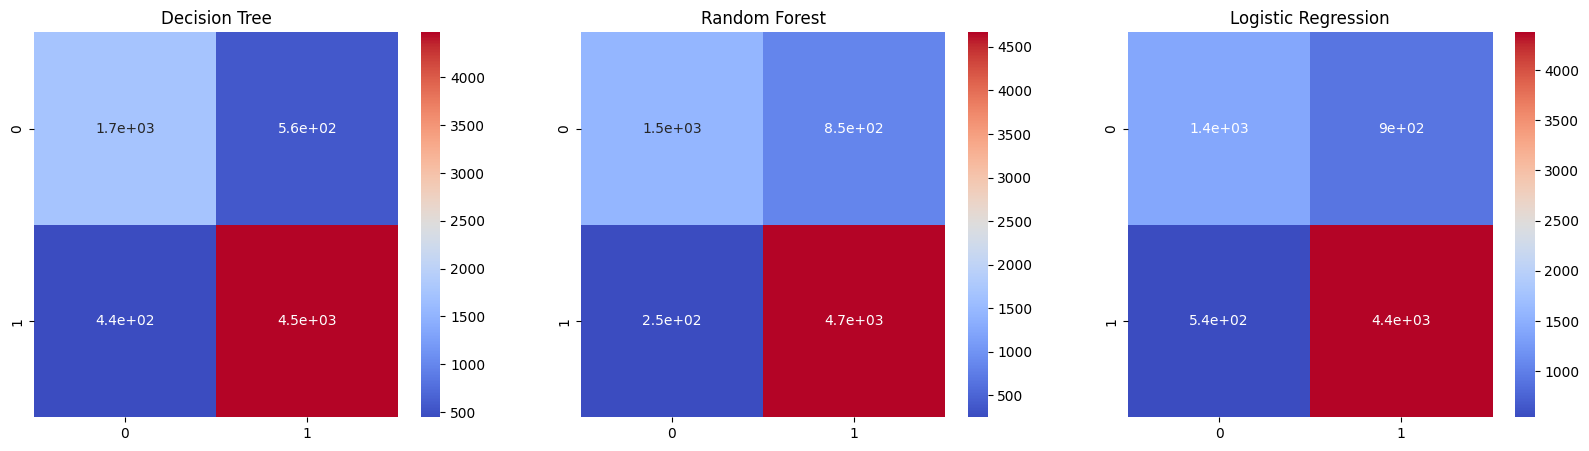

In [186]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Decision Tree')
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Random Forest')
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, cmap='coolwarm', ax=ax[2]).set_title('Logistic Regression')

### Distribution Plot

/var/folders/_2/sfh5x86n6kv0zn4jxf7qlb7w0000gn/T/ipykernel_1717/512542681.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax=ax[0], hist= False).set_title('Decision Tree')
/var/folders/_2/sfh5x86n6kv0zn4jxf7qlb7w0000gn/T/ipykernel_1717/512542681.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

<Axes: title={'center': 'Logistic Regression'}, xlabel='booking_status', ylabel='Density'>

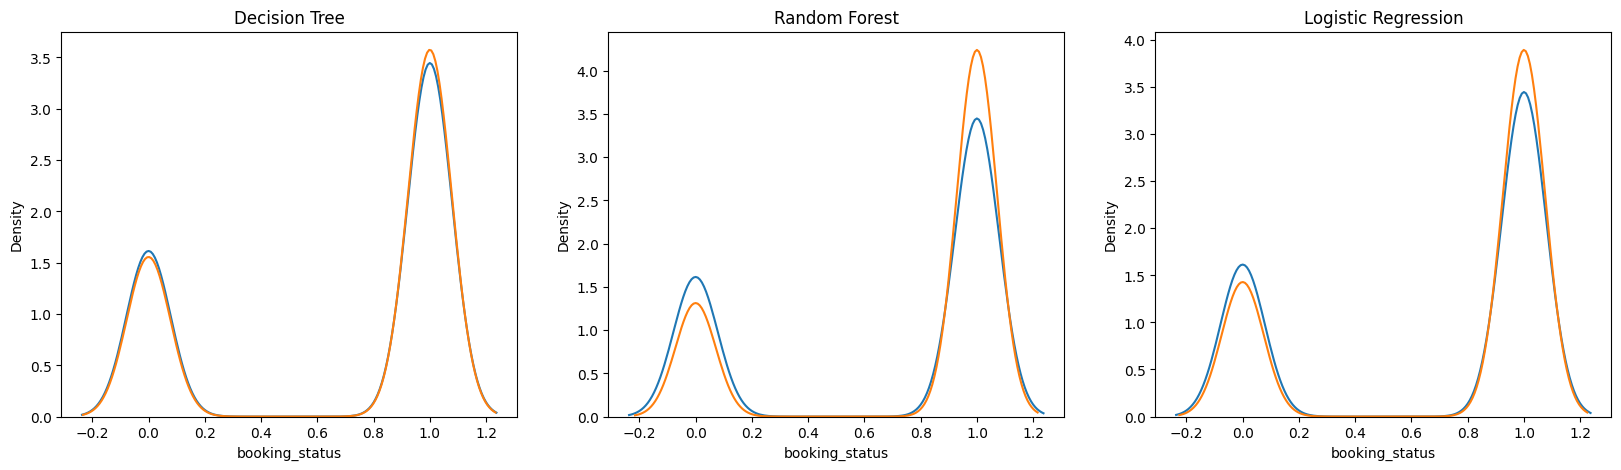

In [187]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))

sns.distplot(y_test, ax=ax[0], hist= False).set_title('Decision Tree')
sns.distplot(d_pred, ax=ax[0], hist = False)

sns.distplot(y_test, ax=ax[1], hist= False).set_title('Random Forest')
sns.distplot(r_pred, ax=ax[1], hist = False)

sns.distplot(y_test, ax=ax[2], hist= False).set_title('Logistic Regression')
sns.distplot(l_pred, ax=ax[2], hist = False)

### Classification Report

In [188]:
from sklearn.metrics import classification_report

print('Decision Tree')
print(classification_report(y_test, d_pred))
print('Random Forest')
print(classification_report(y_test, r_pred))
print('Logistic Regression')
print(classification_report(y_test, l_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2303
           1       0.89      0.91      0.90      4917

    accuracy                           0.86      7220
   macro avg       0.84      0.83      0.84      7220
weighted avg       0.86      0.86      0.86      7220

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.63      0.73      2303
           1       0.85      0.95      0.89      4917

    accuracy                           0.85      7220
   macro avg       0.85      0.79      0.81      7220
weighted avg       0.85      0.85      0.84      7220

Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      2303
           1       0.83      0.89      0.86      4917

    accuracy                           0.80      7220
   macro avg       0.78      0.75      0.76      7220
weighted avg       0.79   

### Model Metrics

In [189]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, d_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, d_pred))

print('\n')

print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, r_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, r_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, r_pred))

print('\n')

print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, l_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, l_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, l_pred))

Decision Tree
Accuracy Score:  0.8609418282548477
Mean Absolute Error:  0.13905817174515236
Mean Squared Error:  0.13905817174515236


Random Forest
Accuracy Score:  0.8481994459833795
Mean Absolute Error:  0.1518005540166205
Mean Squared Error:  0.1518005540166205


Logistic Regression
Accuracy Score:  0.7998614958448753
Mean Absolute Error:  0.20013850415512466
Mean Squared Error:  0.20013850415512466


### Model Comparison

Text(0.5, 1.0, 'Mean Squared Error')

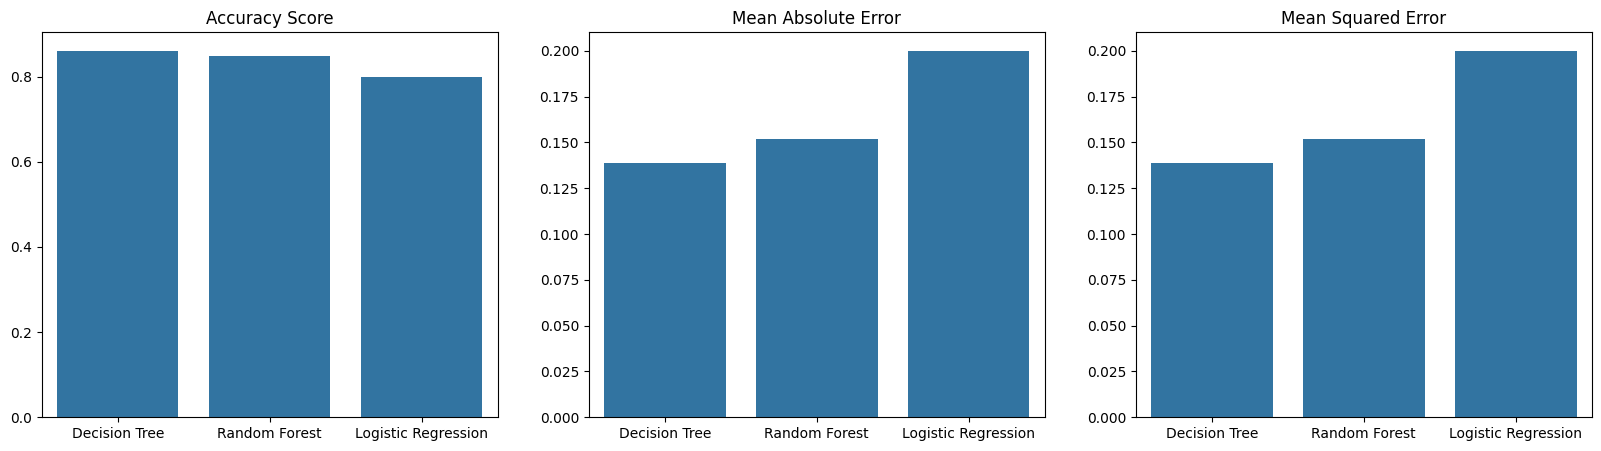

In [190]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [accuracy_score(y_test, d_pred), accuracy_score(y_test, r_pred), accuracy_score(y_test, l_pred)], ax=ax[0]).set_title('Accuracy Score')
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, r_pred), mean_absolute_error(y_test, l_pred)], ax=ax[1]).set_title('Mean Absolute Error')
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_squared_error(y_test, d_pred), mean_squared_error(y_test, r_pred), mean_squared_error(y_test, l_pred)], ax=ax[2]).set_title('Mean Squared Error')

### Feature Importance

Feature Importance from best two models

Text(0.5, 1.0, 'Decision Tree')

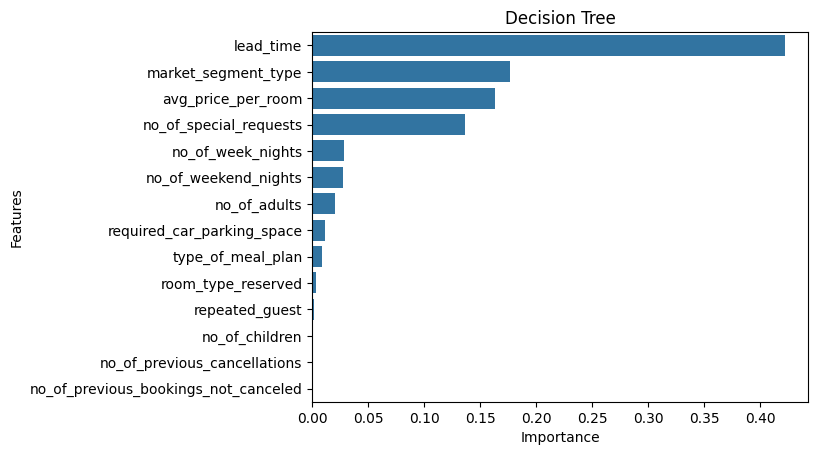

In [191]:
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

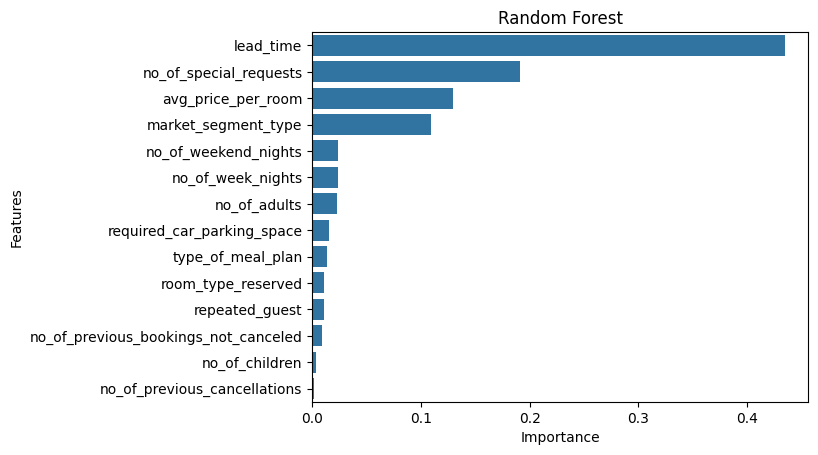

In [192]:
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Random Forest')

## Conclusion

The market segment of the reservation also had an impact on the reservation cancellation. The reservations made through online platforms had the highest number of cancellations. This highlights the hotel's reputation and presence on online platforms. The hotel should try to improve its reputation on online platforms to reduce the reservation cancellation.

Coming to the classification models, I have used Decision Tree Classifier, Random Forest Classifier, Logistic Regression for predicting the reservation cancellation. The Decision Tree Classifier had the highest accuracy i.e. 85% among all the models. 